In [1]:
import pandas as pd

df = pd.read_csv(r"../List of Unicorns in the World.csv")
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment
1,1,SpaceX,$150,12/1/2012,United States,Hawthorne,Industrials
2,2,OpenAI,$80,7/22/2019,United States,San Francisco,Enterprise Tech
3,3,SHEIN,$66,7/3/2018,Singapore,Singapore City,Consumer & Retail
4,4,Stripe,$65,1/23/2014,United States,San Francisco,Financial Services


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1233 non-null   int64 
 1   Company         1233 non-null   object
 2   Valuation ($B)  1233 non-null   object
 3   Date Joined     1233 non-null   object
 4   Country         1233 non-null   object
 5   City            1233 non-null   object
 6   Industry        1233 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.6+ KB


In [3]:
df.describe(include="all")

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
count,1233.000000,1233,1233,1233,1233,1233,1233
unique,NaN,1229,241,767,53,296,8
top,NaN,Branch,$1,7/13/2021,United States,San Francisco,Enterprise Tech
freq,NaN,2,287,8,656,172,388
mean,616.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,356.080749,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,308.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,616.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,924.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#df = df.drop(columns=["Unnamed: 0"])

df['Industry'].value_counts().head(10)

Industry
Enterprise Tech               388
Financial Services            220
Consumer & Retail             213
Industrials                   185
Healthcare & Life Sciences    117
Media & Entertainment          83
Insurance                      26
Health                          1
Name: count, dtype: int64

In [ ]:
#Enterprise Tech leads with 388 companies, followed by Financial Services with around 220, Consumer and Retail with 213, and so on. 

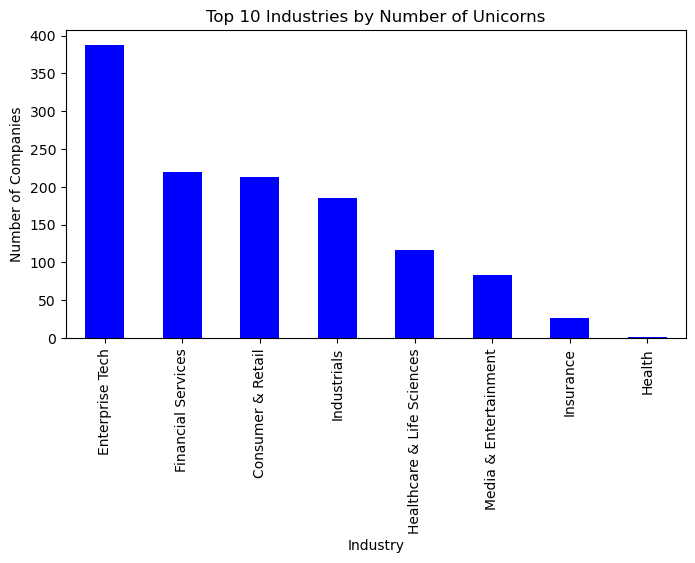

In [12]:
import matplotlib.pyplot as plt

df['Industry'].value_counts().head(10).plot(
    kind= 'bar',
    color= 'blue',
    figsize=(8,4),
    title='Top 10 Industries by Number of Unicorns'
)
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

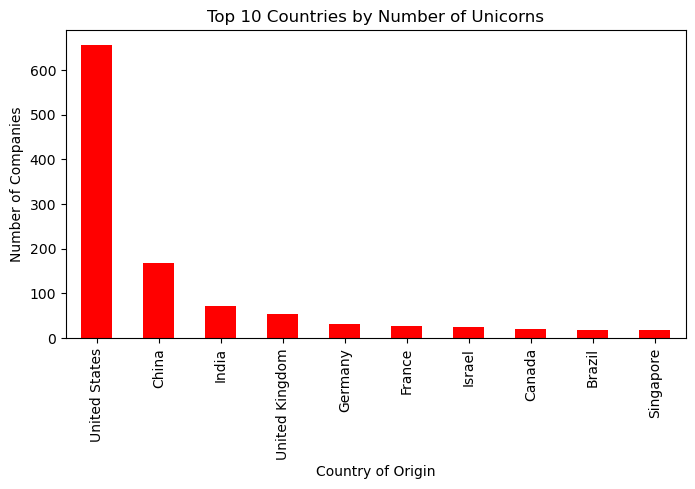

In [13]:
df["Country"].value_counts().head(10).plot(
    kind = 'bar',
    color = 'red',
    figsize = (8,4),
    title = 'Top 10 Countries by Number of Unicorns'
)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Companies')
plt.show()

In [14]:
# Cleaning the Valuation column (removing '$' and 'B')
df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,B]','',regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lendr\AppData\Local\Temp\ipykernel_37732\140163154.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,B]','',regex=True).astype(float)


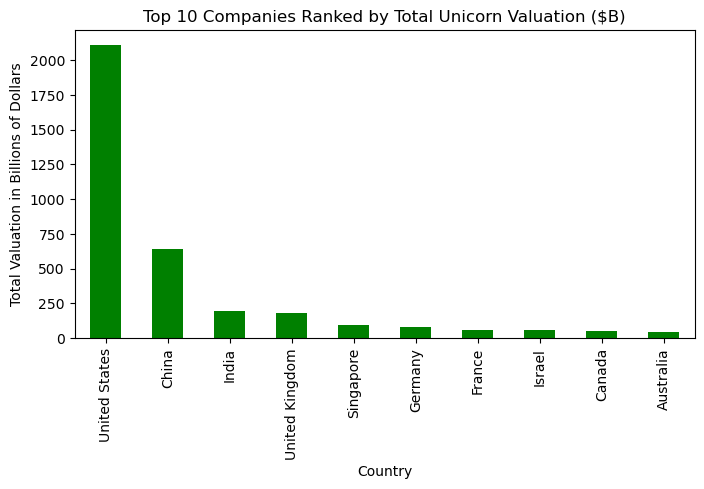

In [17]:
# Calculating the top 10 companies by total Valuation
top_companies_value = df.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

#Ploting
top_companies_value.plot(
    kind='bar',
    color='green',
    figsize=(8,4),
    title = 'Top 10 Companies Ranked by Total Unicorn Valuation ($B)'
)
plt.xlabel("Country")
plt.ylabel('Total Valuation in Billions of Dollars')
plt.show()

In [19]:
# Converting the Date joined to date time
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Counting the Unicorns by year
yearly = df['Date Joined'].dt.year.value_counts().sort_index()

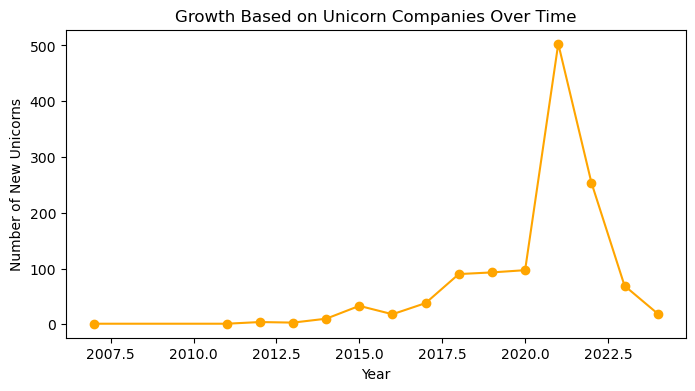

In [20]:
# Ploting 
yearly.plot(
    kind='line',
    color='Orange',
    figsize=(8,4),
    marker='o',
    title='Growth Based on Unicorn Companies Over Time'
)
plt.xlabel('Year')
plt.ylabel('Number of New Unicorns')
plt.show()

Our Conclusion

- Enterprise Tech dominated the unicorn landscape, followed by Financial Services and Consumer Retail, all based on the value_counts and visual charts.
It reflected where global innovation and funding are primarly concentrated in.

- The US(United States) lead by a huge margin, both in terms of unicorn count and total valuation at over a crazy $2 Trillon.

- China and India followed after, and the rest of the world making smaller but notable contributions.

- The sharp spike in 2021 we can see in the last chart marks the pandemic-era boom, which was driven by digital transfromation and low interest rates, following with a decline as the global markets starting balancing out.

Like to Continue?

- Deepen our analysis by linking industries with valuations; which sectors produce the highest-value unicorns.
- Explore geographical trends such as, city or region level insights.
- Integrate additional data like, funding rounds, investors, or IPO exits 